In [1]:
from pricing_environment import PricingEnvironment
from pricing_agent import GPUCBAgent
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_cust=100
norm_dem_curve=lambda p: 1-1/(1+np.exp(-4*(p)+1))

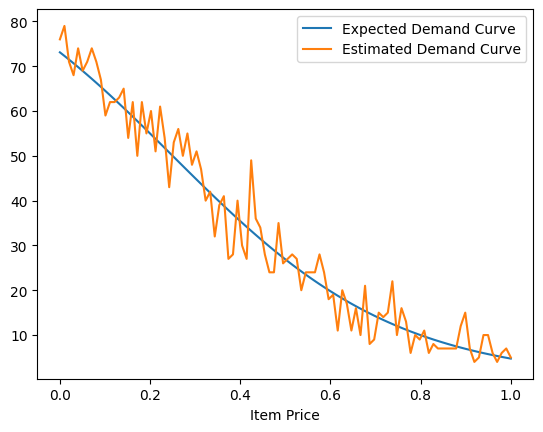

In [3]:
y=norm_dem_curve
prices=np.linspace(0,1,100)
estimated_demand_curve = np.random.binomial(n_cust, norm_dem_curve(prices))

plt.figure()
plt.plot(prices, n_cust*norm_dem_curve(prices), label='Expected Demand Curve')
plt.plot(prices, estimated_demand_curve, label='Estimated Demand Curve')
plt.xlabel('Item Price')
plt.legend()
plt.show()

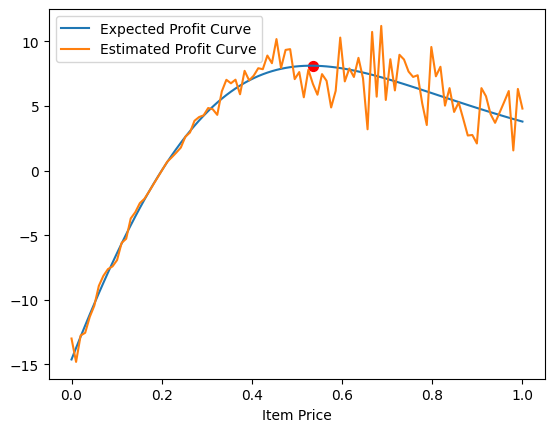

In [4]:
cost = 0.2

expected_profit_curve = n_cust*norm_dem_curve(prices)*(prices-cost)

estimated_profit_curve = np.random.binomial(n_cust, norm_dem_curve(prices))*(prices-cost)

best_price_index = np.argmax(expected_profit_curve)
best_price = prices[best_price_index]

plt.figure()
plt.plot(prices, expected_profit_curve, label='Expected Profit Curve')
plt.plot(prices, estimated_profit_curve, label='Estimated Profit Curve')
plt.scatter(best_price, expected_profit_curve[best_price_index], color='red', s=50)
plt.xlabel('Item Price')
plt.legend()
plt.show()

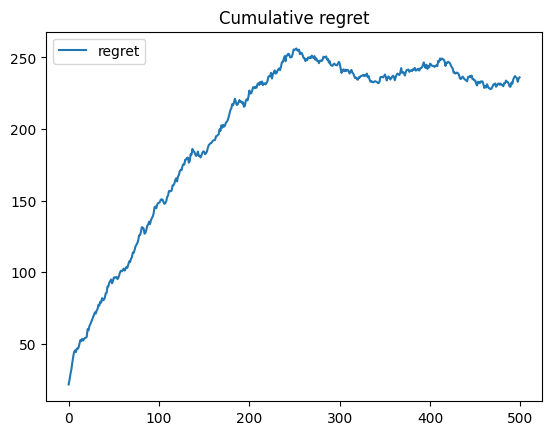

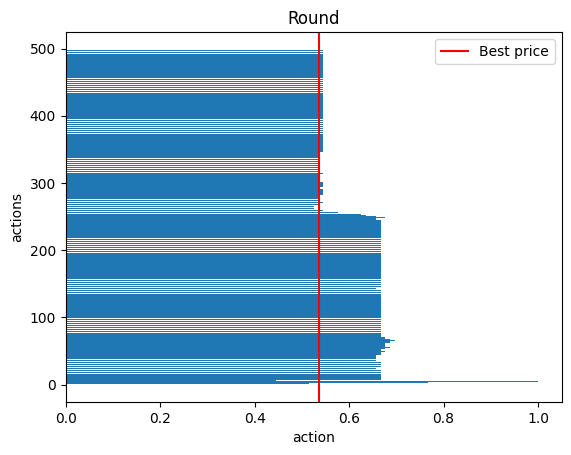

In [61]:
T=500
num_cust=100
pulls=np.array([])
rewards=np.array([])
env=PricingEnvironment(norm_dem_curve,cost)
agent=GPUCBAgent(T)

for t in range(T):
    p_t = agent.pull_arm()
    d_t, r_t = env.round(p_t,num_cust)
    #normalization should be used since in the auction i wont always have the same number of customers
    agent.update(r_t/num_cust)
    rewards = np.append(rewards, r_t)
    pulls=np.append(pulls,p_t)

    
clairvoyant_reward=np.cumsum(np.array([((best_price-cost)*norm_dem_curve(best_price)*num_cust)]*T))
cum_reward=np.cumsum(rewards)
plt.plot(clairvoyant_reward-cum_reward,label='regret')
plt.title('Cumulative regret')
plt.legend()
plt.figure()
plt.barh(np.arange(T),pulls)
plt.axvline(best_price, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('action')
plt.legend()
plt.title('Round')
plt.show()

In [62]:
agent.pull_arm(),best_price

(0.5454545454545455, 0.5353535353535354)